# <center> FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO <br> Y RECONOCIMIENTO DE PATRONES</center>
## <center> Práctico 7, 2019 </center>      

In [1]:
# Se importan las bibliotecas que se utilizarán
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

%matplotlib notebook

## Objetivos

- Aplicar **k-vecinos** más cercanos para **clasificar** entre las 10 categorías de **dígitos**. Optimizar el parámetro *k* utilizando la biblioteca *scikit-learn*.
- Estimar **densidades** de probabilidad mediante el método de **ventanas de Parzen** y aplicarlo a un problema de clasificación. 
- Implementar el algoritmo de **clustering k-means** y aplicarlo en datos sintéticos. Analizar su funcionamiento.   
- Realizar **agrupamiento de datos** mediante **mezcla de gaussianas**. Implementarlo utilizando el esquema **Expectation Maximization** para encontrar los parámetros. Comparar este agrupamiento con el de *k-means*.

## Lista de ejercicios

[Ejercicio 1](#Ejercicio1): *k-vecinos* más cercano       
[Ejercicio 2](#Ejercicio2): ventanas de Parzen   
[Ejercicio 3](#Ejercicio3): k-means   
[Ejercicio 4](#Ejercicio4): mezcla de Gaussianas con EM   

In [2]:
# funciones auxiliares (Ejecutar y seguir)
def error_relativo(x, y):
    ''' devuelve el error relativo'''
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Ejercicio 1: k-vecinos más cercanos

En este ejercicio se utilizará *k-vecinos más cercanos* para clasificar la base de dígitos que viene con *scikit-learn*. La siguiente celda levanta los datos.

In [3]:
# se levantan los dígitos de la base MNIST 
mnist = load_digits()
print('La base de datos MNIST tiene %d dígitos' % len(mnist.data))

La base de datos MNIST tiene 1797 dígitos


**Parte a)** Particionar aleatoriamente los datos utilizando el 70\% de las muestras para entrenamiento, el 10\% para validación y 20\% para test.

In [7]:
np.random.seed(33)
############################################################################################
##########################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  #########################
############################################################################################

X, y = mnist.data, mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125)

############################################################################################
##########################  TERMINA ESPACIO PARA COMPLETAR CODIGO  #########################
###########################################################################################
 
# Se muestra el tamaño de los conjuntos generados
print("El conjunto de entrenamiento tiene {} dígitos".format(len(y_train)))
print("El conjunto de validación tiene {} dígitos".format(len(y_val)))
print("El conjunto de test tiene {} dígitos".format(len(y_test)))

El conjunto de entrenamiento tiene 1257 dígitos
El conjunto de validación tiene 180 dígitos
El conjunto de test tiene 360 dígitos


**Parte b)** Se utilizará la clase `KNeighborsClassifier` de *scikit-learn* para encontrar un clasificador mediante el método de vecino más cercano. Para encontrar el valor óptimo de *k* se usará el error con el conjunto de validación. 

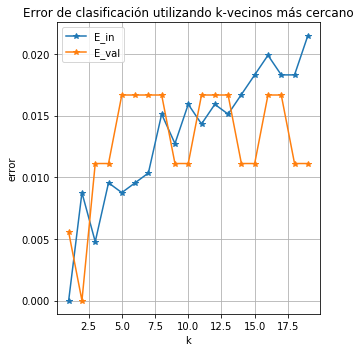

In [24]:
# se determina el rango de valores de k a probar 
rango_k = range(1, 20)
# se inicializan la listas que guardarán E_in y E_val 
E_in = []
E_val = []
 
for k in rango_k:
    
    ####################################################################################
    #################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
    ####################################################################################
    
    # se entrena el clasificador que usa k-vecinos 
    kNN_clf = KNeighborsClassifier(n_neighbors=k)
    kNN_clf.fit(X_train, y_train)
    
    
    # se calculan y guardan E_in y E_val
    E_in.append(1-kNN_clf.score(X_train, y_train))
    E_val.append(1-kNN_clf.score(X_val, y_val))

    
    ####################################################################################
    #################  TERMINA ESPACIO PARA COMPLETAR CODIGO ###########################
    ####################################################################################

plt.figure(figsize=(5,5))
plt.plot(rango_k, E_in,'*-', label='E_in')
plt.plot(rango_k, E_val,'*-', label='E_val')
plt.legend()
plt.grid()
plt.xlabel('k')
plt.ylabel('error')
plt.title('Error de clasificación utilizando k-vecinos más cercano')
plt.tight_layout()

**Parte c)** ¿Cuál es el valor óptimo de *k* y el error con el conjunto de validación para dicho *k* ?

In [29]:
####################################################################################
#################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
####################################################################################

# se encuentra el valor óptimo de k
k_opt = np.argmin(E_val)+1

# error con el conjunto de validación
e_val_opt = E_val[k_opt-1]

####################################################################################
#################  TERMINA ESPACIO PARA COMPLETAR CODIGO ###########################
####################################################################################

print('El valor óptimo de k es %d, el error con el conjunto de validación es %f' % (k_opt, e_val_opt))

El valor óptimo de k es 2, el error con el conjunto de validación es 0.000000


**Parte d)** Entrenar el clasificador óptimo y general las predicciones con el conjunto de test.

In [30]:
####################################################################################
#################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
####################################################################################

# se entrena el clasificador óptimo
knn_clf = KNeighborsClassifier(k_opt)
knn_clf.fit(X_train, y_train)

# se generan las predicciones de test
y_test_pred = knn_clf.predict(X_test)
####################################################################################
#################  TERMINA ESPACIO PARA COMPLETAR CODIGO ###########################
####################################################################################

print(confusion_matrix(y_test, y_test_pred))

[[29  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  0 36  1  0  0  0]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0]
 [ 0  3  0  0  0  0  0  0 41  0]
 [ 0  1  0  0  0  1  0  0  1 30]]


**Parte e)** Una forma alternativa de estimar los parámetros óptimos es mediante *validación cruzada* con *5 folds*. Utilice la clase `GridSearchCV` de *scikit-learn* para estimar los parámetros óptimos. 

In [ ]:
####################################################################################
#################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
####################################################################################

# knn_cv =   # GridSearchCV para k-nn

####################################################################################
#################  TERMINA ESPACIO PARA COMPLETAR CODIGO ###########################
####################################################################################
print('k optimo mediante cv = %f' % knn_cv.best_params_['n_neighbors'])
print('accuracy = %f' % knn_cv.best_score_)

**Parte f)** ¿Coinciden los valores óptimos encontrados? ¿Qué método le parece más adecuado para este problema en particular? 

**Respuesta:**  
... 

**Parte g)** Dado el gran desempeño alcanzado por *k-nn* en la separación de dígitos, se merece una oportunidad en el problema de separación de sonidos urbanos del práctico anterior. Evalúelo y comente los resultados. 

## Ejercicio 2: ventanas de Parzen

En este ejercicio se utilizará la base de datos Iris para clasificación de flores disponible en *scikit learn*. Se considerará sólo el *largo* y el *ancho* del pétalo como características.

In [ ]:
data = load_iris()
print(data['feature_names'])

**Parte a)** Construya el vector de características y las etiquetas que se utilizarán en este ejercicio.

In [ ]:
features = [2,3] # se eligen dos características

####################################################################################
#################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
####################################################################################

# Vector de características en X
# X =

# se almacenan las etiquetas en el vector labels
# labels =


####################################################################################
#################  TERMINA ESPACIO PARA COMPLETAR CODIGO ###########################
####################################################################################

A continuación se muestra la distribución de patrones para las tres clases presentes, cada
una de ellas con un color diferente.

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1], c=labels)
plt.xlabel(data['feature_names'][features[0]])
plt.ylabel(data['feature_names'][features[1]])
plt.title('Distribución de datos para la base iris')
plt.tight_layout()

Se desean estimar las densidades de cada clase utilizando el método de ventanas de Parzen con un *kernel* gaussiano de la forma: 

$$
K(\mathbf{x}, \mathbf{z_i})=\frac{1}{(2\pi)^{d/2}\vert \Sigma \vert^{1/2}} 
                               \exp ^{\left(-\frac{1}{2}\left( \mathbf{x} - \mathbf{z_i} \right)^T 
                                        \Sigma^{-1} \left( \mathbf{x} - \mathbf{z_i} \right) \right)}
$$

**Parte b)** Implementar el método `evaluar_kernel_gaussiano()`. Dicho método se utilizará para determinar la similitud entre la muestra a evaluar $\mathbf{x}$ y una muestra de entrenamiento $\mathbf{z_i}$ utilizando un *kernel gaussiano*. 

In [ ]:
def evaluar_kernel_gaussiano(x, mu, Sigma):
    '''
    Entrada:
        x: vector a evaluar, de dimensión (d,1)
        mu: media del núcleo gaussiano, de dimensión (d,1)
        Sigma: covarianza del núcleo gaussiano, de dimensión (d,d)
    Salida:
        p: resultado de evaluar el kernel gaussiano
    '''
    ####################################################################################
    #################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
    ####################################################################################
    
    # p =
    
    ####################################################################################
    #################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
    ####################################################################################
    
    p = np.squeeze(p) # para asegurar que la salida es un escalar
    return p

In [ ]:
# Se testea evaluar_kernel_gaussiano() 

np.random.seed(33)
d=5
x_ = np.random.randn(d,1)
mu_= np.random.randn(d,1)
Sigma_ = np.random.randn(d,d)
Sigma_ = Sigma_ @ Sigma_.T  # para que sea semidefinida positiva

p = evaluar_kernel_gaussiano(x_, mu_, Sigma_)

p_correcto = 2.29350214e-07
# Se compara la salida con la nuestra. El error debería ser menor a e-9
print('Testeando la función evaluar_kernel_gaussiano()')
print('Diferencia: ', error_relativo(p, p_correcto))

**Parte c)** Implementar el método `estimar_densidad()` que evalúa, en un conjunto de puntos X, la densidad de probabilidad de pertenecer a una clase. La densidad se estima mediante el método de ventanas de Parzen utilizando los patrones de entrenamiento de dicha clase.

In [ ]:
def estimar_densidad(X, Z, Sigma):
    '''
    Utiliza los patrones de entrenamiento Z pertenecientes a una misma clase, para 
    evaluar la densidad de probabilidad de dicha clase en los puntos pasados en X. 
    La densidad se estima mediante el método de ventanas de Parzen con núcleo gaussiano.   
    Entrada:
        X: matriz de tamaño Nxd que contiene los puntos en donde se quiere 
           evaluar la densidad
        Z: matriz de tamaño Mxd que contiene los puntos de entrenamiento
        Sigma: matriz de covarianza del kernel gaussiano
    Salida:
        densidades: vector de tamaño N que almacena la densidad en los puntos evaluados
    '''
    
    N, d = X.shape
    M, d = Z.shape
    
    ####################################################################################
    #################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
    ####################################################################################
    
    # densidades =  
    
    ####################################################################################
    #################  TERMINA ESPACIO PARA COMPLETAR CODIGO ###########################
    ####################################################################################
    
    return densidades

In [ ]:
# Se testea estimar_densidad() 
np.random.seed(45)
N=4; M=6
d=3
X_ = np.random.randn(N,d)
Z_=  np.random.randn(M,d)
Sigma_ = np.random.randn(d,d)
Sigma_ = Sigma_ @ Sigma_.T  # para que sea semidefinida positiva

densidades = estimar_densidad(X_, Z_, Sigma_)
densidades_correctas = np.array([5.98438614e-02, 0, 4.83415432e-02, 1.86978536e-20])
# Se compara la salida con la nuestra. El error debería ser menor a e-9
print('Testeando la función evaluar_kernel_gaussiano()')
print('Diferencia: ', error_relativo(densidades, densidades_correctas))

**Parte d)** Se estimará la densidad de cada una de las clases de la base Iris en una grilla de 50x50 puntos.
Se considerará para la estimación de las densidades una matriz $\Sigma$ de la forma $\Sigma=r^2 \Sigma_c$ siendo $\Sigma_c$ la matriz de covarianza de los datos pretenecientes a la clase y $r$ el parámetro que controla el ancho del *núcleo gaussiano*. 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

r=1 # ancho del núcleo gaussiano

for c in range(3):  # para cada una de las clases
    
    # se crea la grilla de 50x50 puntos que cubre el dominio de los puntos de la clase
    x = np.linspace(X[labels==c,0].min(), X[labels==c,0].max())
    y = np.linspace(X[labels==c,1].min(), X[labels==c,1].max())
    xx, yy = np.meshgrid(x, y)
    
    ####################################################################################
    #################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
    ####################################################################################    
    
    # Se calculan las densidades en los puntos de la grilla. 
    # el arreglo 'densidades' tiene que tener las mismas dimensiones que xx e yy 
    
    # densidades = 
    
    ####################################################################################
    #################  TERMINA ESPACIO PARA COMPLETAR CODIGO ###########################
    ####################################################################################    

    fig = plt.figure(num='surface', figsize=(5,5)) 
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(xx, yy, densidades, rstride=1, cstride=1, 
                           cmap= plt.cm.coolwarm)

    
    plt.figure(num='contour', figsize=(5,5))
    plt.scatter(X[labels==c,0],X[labels==c,1])
    cs = plt.contour(xx, yy, densidades, levels=5)
    plt.clabel(cs, inline=1, fontsize=10)

fig = plt.figure(num='surface', figsize=(5,5)) 
plt.title('Densidades estimadas')
plt.tight_layout()    
plt.figure(num='contour', figsize=(5,5))
plt.grid()
plt.title('Líneas de nivel de la densidades estimadas')
plt.tight_layout()

**Parte e)** Comente sobre la influencia del ancho de banda *r*  en las densidades estimadas y establezca un rango de valores razonable. Proponga un mecanismo para determinarlo automáticamente, esto es especialmente útil en aquellos casos en que no es posible visualizar las densidades resultantes.

**Respuesta:**    
...

<a id="Ejercicio3"></a>
## Ejercicio 3: k-means

En este ejercicio se verá k-means como técnica de agrupamiento de datos.

**Parte a)** Completar la implementación del algoritmo k-means.

In [ ]:
from sklearn.metrics import pairwise_distances

def k_means(X, k, semilla=43):    
    '''
    Entrada:
        X - arreglo de tamaño (N,d) que contiene los vectores de entrada
        k - numero de clusters a encontrar
        semilla - semilla que se usa para inicializar los centros.
                  Elegir aleatoriamente k vectores de X
    Salida:
        centros: arreglo de tamaño (N,d) que contiene los centros de los 
                 clusters encontrados
        etiquetas: vector de largo N que contiene a que cluster 
                   fue asignada la muestra  
    '''
    
    np.random.seed(semilla)
    
    convergio = False  
    n_iter = 0
    ###########################################################################################
    ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
    ###########################################################################################
    
    # Se inicializan los centros de los clusters a muestras elegidas 
    # aleatoriamente 

    # centros = 
    
    while not convergio:
        
        # 1. Se asignan las etiquetas al cluster cuyo centro es el más cercano. 
        # Se sugiere usar pairwise_distances del paquete metrics de sklearn 
        
        # etiquetas = 
        

        # 2. Se calculan los nuevos centros
        # centros_nuevos = 

        # 3. Se evalúa la condición de convergencia (que los centros no cambien)
        # convergio = 

        
        # 4. Se actualiza la variable centros y se aumenta el número de iteración

    
    ###########################################################################################
    ##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
    ###########################################################################################
    print('El algoritmo finalizó en la iter %d' % n_iter)
    
    return centros, etiquetas   

**Parte b)** Aplicarlo al conjunto de datos del archivo `data/data_4clusters.npz`. La variable `X` contiene los patrones a agrupar. En este caso el número de clusters es 4.

In [ ]:
f = np.load('data/data_4clusters.npz')
X = f['X']
y = f['y']
print(X.shape)

###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

# centros, asignaciones = 

###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

dot_size = 50
cmap = 'viridis'
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X[:, 0], X[:, 1], c=asignaciones, s=dot_size, cmap=cmap)
plt.title('Resultado de k-means', fontsize=18)
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()

**Parte c)** Verificar el correcto funcionamiento del algoritmo comparando los resultados obtenidos con los de la variable `y`. Para ello usar algunas de las [métricas](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) disponibles en *scikit-learn*. 

In [ ]:
# adj_rand_score = 
# adj_mi_score = 

**Parte d)** Al variar el valor de la semilla que controla la inicialización ¿Siempre obtuvo resultados satisfactorios? En caso negativo, proponga un esquema para robustecer el método.

**Respuesta:**    
...

**Parte e)** Utilice el algoritmo k-means para separar el conjunto de datos `data_4clusters_stretched` y comente los resultados.

In [ ]:
f=np.load('data/data_4clusters_stretched.npz')
f.files
X_st = f['X_st']
y_st = f['y_st']

###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

# centros_stretched, asignaciones_stretched = 

###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_st[:, 0], X_st[:, 1], c=asignaciones_stretched, s=dot_size, cmap=cmap)
plt.title('Resultado de k-means', fontsize=18)


**Respuesta:**   
...

<a id="Ejercicio4"></a>
## Ejercicio 4: EM

El objetivo de este ejercicio es implementar el esquema Expectation Maximization (EM) para encontrar los parámetros que maximizan la verosimilitud del modelo Mezcla de Gaussianas para un conjunto de datos $X$. Si se utilizan $\textit{K}$ componentes en la mezcla, el modelo está dado por:

$$
p(\mathbf{x_n|\Theta})=\sum_{j=1}^K w_j \mathcal{N}\left( \mathbf{x_n} \vert \mathbf{\mu_j},\mathbf{\Sigma_j} \right)
$$

Se implementará una función que utiliza el esquema EM para encontrar los parámetros óptimos en el caso de Mezcla de Gaussianas. Dentro de la función el esquema sigue los siguientes pasos:

1. Inicialización
2. Loop donde se calculan:
    - *Expectation Step* 
    - *Maximization Step*  
    - log verosimilitud de los datos
    - se evalúa condición de continuidad en el loop


**Parte a)** Implementar la función `inicializar_mezcla()` que es la encargada de inicializar las medias $\mathbf{\mu_j}$, las covarianzas $\mathbf{\Sigma_j}$ y los coeficientes $\mathbf{w}$ de la mezcla . Para facilitar la comparación con el algoritmo *k-means* del ejercicio anterior se sugiere inicializar los $\mathbf{\mu_j}$ a $\textit{k}$ vectores de $X$ elegidos aleatoriamente. 

In [ ]:
def inicializar_mezcla(X, k, semilla):
    '''
    Entrada:
        X: matriz de tamaño (N,d) que contiene N muestras, una por fila
        k: número de clusters a encontrar
        semilla: hace repetible la inicialización aleatoria de parámetros
    Salida:
        w: vector de largo k que contiene los pesos de la mezcla. 
           Se deben inicializar a valores aleatorios cuya suma da 1 
        mus: arreglo de tamaño (k,d) que contiene las k medias
        sigmas: arreglo de tamaño (k,d,d) que contiene las matrices de covarianza de los clusters
    '''
    N, d = X.shape
    
    # la semilla controla la inicialización de los parámetros
    np.random.seed(semilla)
    
    ######################################################################################
    ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   ########################
    ######################################################################################

    # se inicializan los mus eligiendo k vectores al azar
    # mus = 
    
    # los sigmas se inicializan a la identidad
    # sigmas = 
    
    # se inicializan el vector de pesos
    # w =
    
    ########################################################################################
    ##################    TERMINAA ESPACIO PARA COMPLETAR CODIGO   #########################
    ########################################################################################
    
    return w, mus, sigmas

In [ ]:
# Se testea inicializar_mezcla() 
N=7; d=2; k=2
X_ = np.random.randn(N,d)
semilla = 43
w, mus, sigmas = inicializar_mezcla(X, k, semilla)

sigmas_correctos = np.array([[[1., 0.], [0., 1.]], [[1., 0.], [0., 1.]]])

print('Testeando la función inicializar_mezcla()')
assert np.sum(w)==1, 'La suma de los w debe dar 1'
assert np.min(w)>=0, 'Los w deben ser positivos o cero'
assert mus.shape == (k,d), 'El tamaño de la matriz de mus no es correcto'
for j in range(k):
    assert np.allclose(sigmas[j], np.eye(len(sigmas[j]))), 'Los sigmas deben inicializarse a la identidad'


**Parte b)** Implementar `expectation_step`. Se calcula la probabilidad de que la *n-ésima* muestra haya sido generada por la componente *j-ésima* de la mezcla. Para ello se utilizan los parámetros actuales   

$$
\gamma_{nj} = \frac{w_j \mathcal{N}\left( \mathbf{x_n} \vert \mathbf{\mu_j},\mathbf{\Sigma_j} \right)}{\sum_{l=1}^{L} w_l \mathcal{N}\left( \mathbf{x_n} \vert \mathbf{\mu_l},\mathbf{\Sigma_l} \right)} 
$$

In [ ]:
def expectation_step(X, w, mus, sigmas):
    '''
    Entrada:
        X: matriz de tamaño Nxd con las muestras a evaluar
        w: vector de largo k que contiene los pesos de la mezcla. 
        mus: arreglo de tamaño (k,d) que contiene las k medias
        sigmas: arreglo de tamaño (k,d,d) que contiene las matrices de covarianza de los clusters
    Salida:
        gammas: matriz de tamaño Nxk con las probabilidades de pertenencia a cada cluster
    '''
    

    ######################################################################################
    ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   ########################
    ######################################################################################
    
    # gammas = 
    
    ######################################################################################
    ##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   ########################
    ######################################################################################
    return gammas

In [ ]:
# Se testea expectation_step() 
np.random.seed(3)
N=2; d=3; k=2
X_ = np.random.randn(N,d)
w_ = np.random.rand(k)
w_ = w_ / np.sum(w_)
mus_= np.random.randn(k,d)
sigmas_= np.random.randn(k,d,d)
for j in range(k):
    sigmas_[j]= sigmas_[j] @ sigmas_[j].T

gammas = expectation_step(X_, w_, mus_, sigmas_)
print(gammas)
gammas_correctos = np.array([[1.34208238e-04, 9.99865792e-01],
                             [9.99999062e-01, 9.38144350e-07]])

# Se compara la salida con la nuestra. Los errores deberían ser del orden de e-9 o menos
print('Testeando la función expectation_step()')
print('Diferencias en gammas: ', error_relativo(gammas, gammas_correctos))

**Parte c)** Implementar `maximization_step()`. Se encuentran los parámetros óptimos utilizando la distribución de $\gamma_{nj}$ actual

\begin{align*}
&N_j                       = \sum_{n=1}^{N}\gamma_{nj} \\
&\mathbf{\mu_j^{new}}      = \frac{1}{N_j}\sum_{n=1}^{N}\gamma_{nj}\mathbf{x_n}  \\
&\mathbf{\Sigma_j^{new}}   = \frac{1}{N_j}\sum_{n=1}^{N}\gamma_{nj}\left(\mathbf{x_n}-\mathbf{\mu_j}\right)\left(\mathbf{x_n}-\mathbf{\mu_j}\right)^T  \\
&w_j^{new}               = \frac{N_j}{N} \\
\end{align*}

In [ ]:
def maximization_step(X, gammas):
    '''
    Entrada:
        X: matriz de tamaño Nxd con las muestras a evaluar
        gammas: matriz de tamaño Nxk con las probabilidades de pertenencia a cada cluster
    Salida:
        w: vector de pesos de la mezcla
        mus: arreglo de (k,d) con las medias de los clusters
        sigmas: arreglo de (k,d,d) que contiene las matrices de covarianza de los clusters        
    '''
    
    ######################################################################################
    ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   ########################
    ######################################################################################    
    
    # w =

    # mus =

    # sigmas =
        
    ######################################################################################
    ##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   ########################
    ######################################################################################
        
        
    return w, mus, sigmas

In [ ]:
# Se testea maximization_step() 
np.random.seed(84)
N=5; d=2; k=2
X_ = np.random.randn(N,d)
gammas_ = np.random.randn(N,k)
w, mus, sigmas = maximization_step(X_, gammas_)

w_correcto = np.array([-0.50647492,  0.60709566])
mus_correctos = np.array([[ 0.03196345, -1.57011573], [-0.12383003, -0.67268656]])
sigmas_correctos = np.array([[[ 0.58728466, -0.36449661],[-0.36449661,  0.4157087 ]],
                             [[ 0.21543145, -0.16303434],[-0.16303434,  0.30495924]]])

# Se compara la salida con la nuestra. Los errores deberían ser del orden de e-8 o menos
print('Testeando la función inicializar_mezcla()')
print('Diferencias en w: ', error_relativo(w, w_correcto))
print('Diferencias en mus: ', error_relativo(mus, mus_correctos))
print('Diferencias en sigmas: ', error_relativo(sigmas, sigmas_correctos))

**Parte e)** Implemente el método `log_verosimilitud()` que evalúa la log-verosimilitud de los datos con el modelo. 

In [ ]:
from scipy.stats import multivariate_normal as mvn

def log_verosimilitud(X, w, mus, sigmas):
    '''
    Entrada:
        X: matriz de tamaño Nxd que contiene las muestras
        w: vector de tamaño k que contiene los pesos actuales
        mus: matriz de tamaño (k,d) que contiene las medias, una por fila
        sigmas: arreglo de tamaño (k,d,d) que contiene las matrices de covarianza
     Salida:
        log_ver: log verosimilitud de las muestras con el modelo (escalar)
    '''
    
    ######################################################################################
    ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   ########################
    ######################################################################################
        
    # log_ver =   
    
    ######################################################################################
    ##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   ########################
    ######################################################################################
    return log_ver

In [ ]:
# Se testea log_verosimilitud() 
np.random.seed(22)
N=3; d=3; k=2
X_ = np.random.randn(N,d)
w_ = np.random.rand(k)
w_ = w_ / np.sum(w_)
mus_= np.random.randn(k,d)
sigmas_= np.random.randn(k,d,d)
for j in range(k):
    sigmas_[j]= sigmas_[j] @ sigmas_[j].T

log_ver = log_verosimilitud(X_, w_, mus_, sigmas_)
print(log_ver)
log_ver_correcto = -28.48357133785

# Se compara la salida con la nuestra. El error debería ser del orden de e-9 o menos
print('Testeando la función log_verosimilitud()')
print('Diferencias en log_ver: ', error_relativo(log_ver, log_ver_correcto))

**Parte f)** Complete la implementación de `gmm_EM`. Para ello utilice las implementaciones de las partes anteriores.

In [ ]:
def gmm_EM(X, k, tol=0.01, max_iter=100, semilla = 2):
    '''
    Entrada:
        X: matriz de tamaño Nxd que contiene N muestras, una por fila
        k: número de clusters a encontrar
        tol: si la log verosimilitud en el paso actual no mejora al menos tol
             respecto a la del paso anterior se termina la optimización 
        max_iter: máximo número de iteraciones en la optimización
        semilla: semilla a utilizar en la inicialización de las gaussianas
    Salida:
        log_ver: lista que almacena las log-verosimilitudes calculadas durante la optimización
        gammas: matriz de tamaño Nxk con las probabilidades de pertenencia a cada cluster
        w: vector de tamaño k que contiene los pesos estimados
        mus: matriz de tamaño (k,d) que contiene las medias, una por fila
        sigmas: arreglo de tamaño (k,d,d) que contiene las matrices de covarianza
    '''
    N, d = X.shape
    
    w, mus, sigmas = inicializar_mezcla(X, k, semilla)

    log_ver_previa = -np.infty ; 
    log_ver=[] # lista que almacena las log-verosimilitudes durante la optimización
    
    termino = False
    n_iter = 0
    while not termino:
        
       ######################################################################################
       ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   ########################
       ######################################################################################        
        
        # E-step   
      

        # M-step        
    
 
        # se actualiza la log verosimilitud
        # log_ver_actual =
        
        # se evalúa condición de terminación (dos condiciones)
        # termino =  
        
        ######################################################################################
        ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   ########################
        ######################################################################################
        
        log_ver.append(log_ver_actual)
        log_ver_previa = log_ver_actual

        n_iter += 1
    
        print('Iteración %d, log verosimilitud = %f ' % (n_iter, log_ver_actual))
        
    return log_ver, gammas, w, mus, sigmas

## Evaluación utilizando data_4clusters

La siguiente celda evalúa la implementación realizada. Verifique que la log verosimilitud es monótona creciente.

In [ ]:
f=np.load('data/data_4clusters_stretched.npz')
f.files
X_st = f['X_st']
y_st = f['y_st']
#log_vero, gammas, w, mus, sigmas = gmm_EM(X_st, k=4, max_iter=100, tol=0.001)
log_vero, gammas, w, mus, sigmas = gmm_EM(X_st, k=4, max_iter=100, tol=0.001, semilla=22)

plt.figure()
plt.plot(log_vero)
plt.title('Log verosimilitud')
plt.xlabel('iteraciones')

**Parte g)** Realice la asignación de clusters y compare los resultados con los obtenidos con el algoritmo *k-means*.

In [ ]:
######################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   ########################
###################################################################################### 
# vector de tamaño N que almacena los clusters asignados a cada muestra 
# asignaciones_gmm =      

######################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   ########################
###################################################################################### 

In [ ]:
# Se muestran con el mismo color los puntos pertenecientes al mismo cluster 
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_st[:, 0], X_st[:, 1], c=asignaciones_gmm, s=dot_size, cmap=cmap)
plt.title('resultado EM', fontsize=18)